#Installing and Importing Libraries

1.    Tensorflow, sklearn, NLTK, pandas, numpy,  matplotlib, seaborn, wordcloud (NLP, Data manipulations, Data Visualizing)




In [1]:
pip install keras-tuner

In [2]:
import tensorflow as tf
import pandas as pd
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import keras_tuner as kt
from wordcloud import WordCloud
from tensorflow.keras.models import Sequential
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
#Load Dataset

fake_df = pd.read_csv('Fake.csv')
real_df = pd.read_csv('True.csv')

In [4]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
fake_df.shape

(23481, 4)

In [6]:
real_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
real_df.shape

(21417, 4)

#Data Preprocessing

Menggunakan prinsip Garbage in Garbage Out

In [8]:
#Adding labels to the datasets

fake_df['label'] = 1  # Fake news
real_df['label'] = 0  # Real news

In [9]:
#Combining the datasets as one

df = pd.concat([fake_df, real_df], ignore_index=True)

df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [10]:
#Total Data
df.shape

(44898, 5)

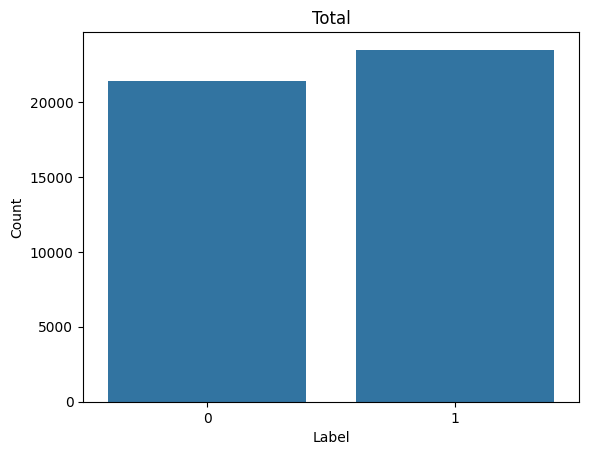

In [11]:
sns.countplot(x='label', data=df)
plt.title('Total')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [12]:
#Dropping the Title, Subject, Date Columns (Irrelevant)
data = df.drop(["title", "subject","date"], axis = 1)
data.head()

,text,label
0,Donald Trump just couldn t wish all Americans ...,1
1,House Intelligence Committee Chairman Devin Nu...,1
2,"On Friday, it was revealed that former Milwauk...",1
3,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis used his annual Christmas Day mes...,1


In [13]:
#Check for Null Values

data.isnull().sum()

,0
text,0
label,0


In [14]:
# Shuffling data
data = data.sample(frac=1)
data.reset_index(inplace=True)
data.drop(["index"], axis=1, inplace=True)

In [15]:
# Text preprocessing function (Deleting irrelevant words, symbols, numbers)

# Download NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove stopwords
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

df['text'] = df['text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


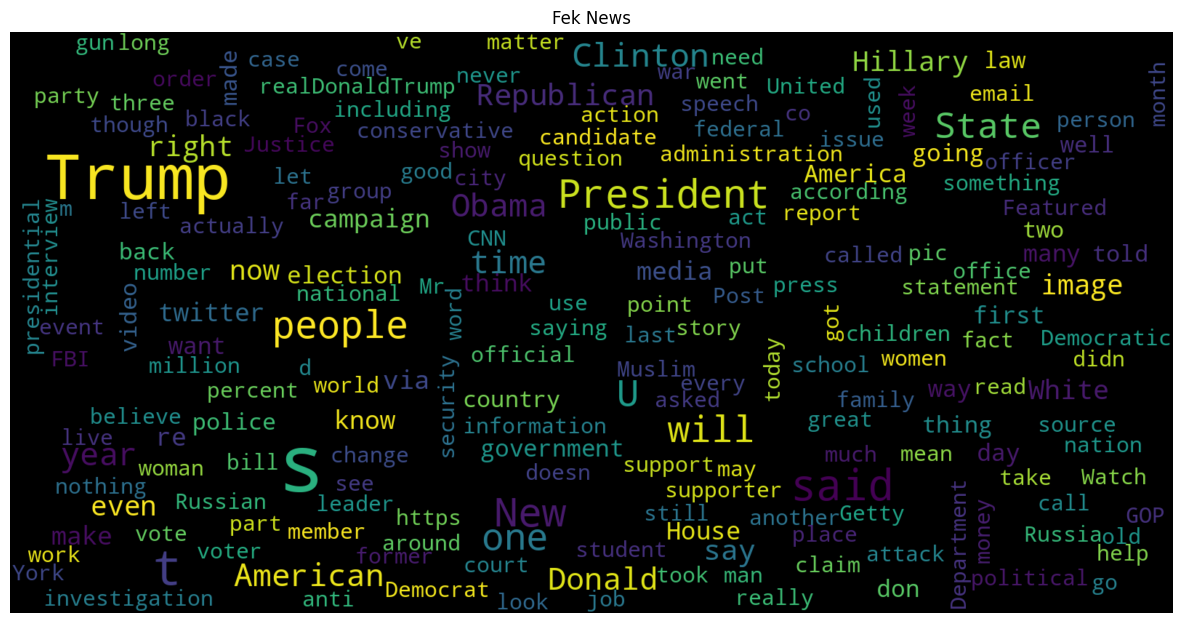

In [16]:
#Visualising WordCloud (to get a visual look of the data)


consolidated = ' '.join(
    word for word in data['text'][data['label'] == 1].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.title('Fek News')
plt.show()

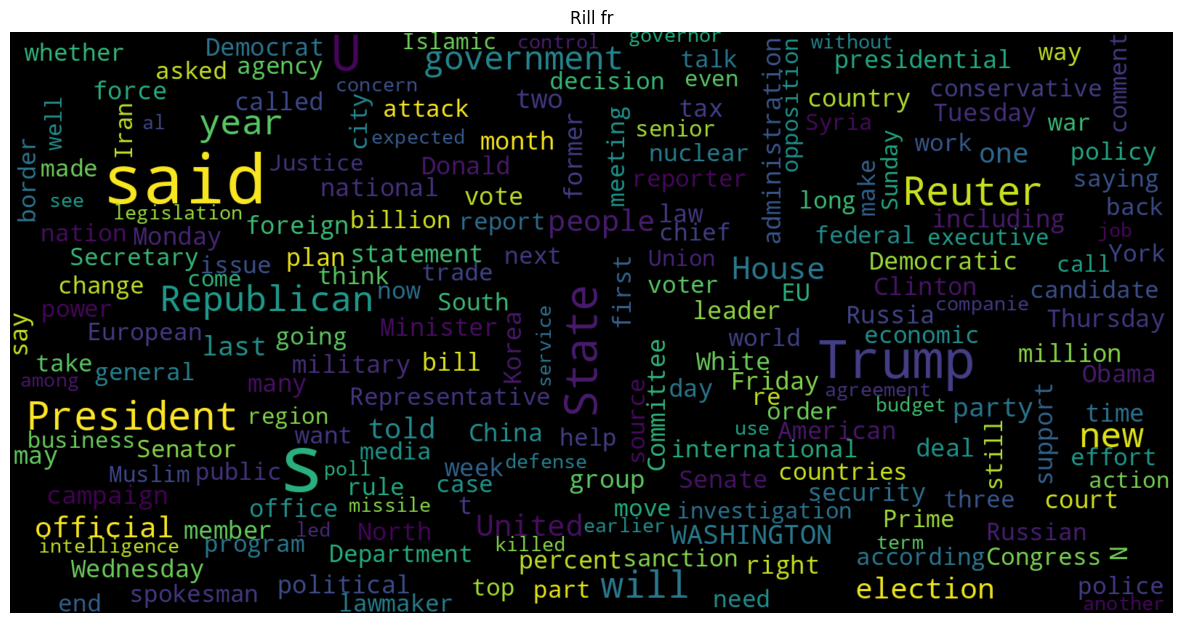

In [17]:
#Real News

consolidated = ' '.join(
    word for word in data['text'][data['label'] == 0].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.title('Rill fr')
plt.show()

In [18]:
#Train Test Split, 80 Training : 20  Testing

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Extract text and labels
train_texts = train_df['text'].tolist()
train_labels = train_df['label'].tolist()

test_texts = test_df['text'].tolist()
test_labels = test_df['label'].tolist()

#Feature Engineering

Process of selecting, transforming, or creating new features from raw data (Above) to improve the performance of machine learning models.


In [19]:
# Tokenize the text
tokenizer = Tokenizer(num_words=10000)  # Use top 10,000 words
tokenizer.fit_on_texts(train_texts)

# Convert text to sequences
train_sequences = tokenizer.texts_to_sequences(train_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)

# Pad sequences to the same length
max_len = 128  # Maximum sequence length
train_sequences = pad_sequences(train_sequences, maxlen=max_len, padding='post', truncating='post')
test_sequences = pad_sequences(test_sequences, maxlen=max_len, padding='post', truncating='post')

# Convert labels to numpy arrays
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

#Model Training

We'll be using 2 models then comparing it with highest accuracy, the models are

1.   LSTM (DL NN)
2.   BERT Model (Transformers)



In [20]:
#LSTM

model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_len),   #Input Layer
    LSTM(128, return_sequences=False),  #Hidden Layer
    Dropout(0.5),  #Hidden Layer, Dropout Layer (Shutting downs the neurons)
    Dense(64, activation='relu'),  #Hidden Layer
    Dropout(0.5),   #Hidden Layer, Dropout Layer (Shutting downs the neurons)
    Dense(1, activation='sigmoid')   #Output Layer
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [21]:
#LSTM Training

history = model.fit(
    train_sequences, train_labels,
    validation_data=(test_sequences, test_labels),
    epochs=5,  #5 times
    batch_size=64
)

Epoch 1/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.8130 - loss: 0.3787 - val_accuracy: 0.9207 - val_loss: 0.2494
Epoch 2/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.9187 - loss: 0.2721 - val_accuracy: 0.9301 - val_loss: 0.2330
Epoch 3/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9153 - loss: 0.2513 - val_accuracy: 0.8523 - val_loss: 0.2682
Epoch 4/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9184 - loss: 0.2208 - val_accuracy: 0.9705 - val_loss: 0.1017
Epoch 5/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9570 - loss: 0.1204 - val_accuracy: 0.9612 - val_loss: 0.1179


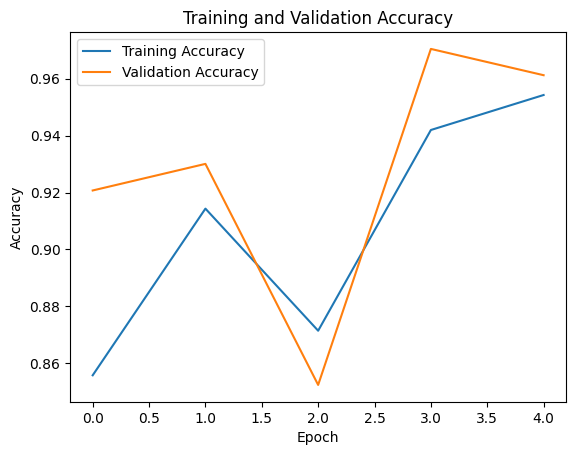

In [22]:
#Good Training and Validation = Chart goes Up

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

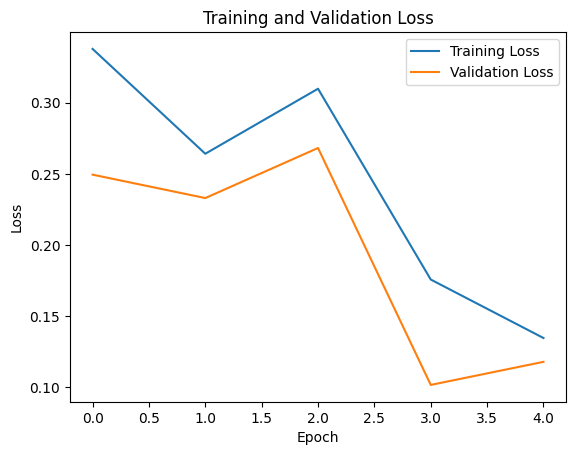

In [23]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Hyperparameter Tuning
Process of Tweaking the LSTM Model Architecture and finding the best model

In [24]:
# Define the model-building function
def build_model(hp):
    model = Sequential()
    model.add(Embedding(input_dim=10000, output_dim=hp.Int('embedding_dim', min_value=64, max_value=256, step=64), input_length=max_len)) #Input Layer
    model.add(LSTM(hp.Int('lstm_units', min_value=64, max_value=256, step=64), return_sequences=False)) #Hidden Layer
    model.add(Dropout(hp.Float('dropout_rate', min_value=0.3, max_value=0.7, step=0.1)))  #Hidden Layer Dropout Layer (Shutting downs the neurons)
    model.add(Dense(hp.Int('dense_units', min_value=32, max_value=128, step=32), activation='relu')) #Hidden Layer
    model.add(Dropout(hp.Float('dropout_rate', min_value=0.3, max_value=0.7, step=0.1))) #Hidden Layer, Dropout Layer (Shutting downs the neurons)
    model.add(Dense(1, activation='sigmoid')) #Output Layer
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Initialize the tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # 5 times to find the best model
    directory='tuner_results',
    project_name='fake_news_lstm'
)

# Perform hyperparameter tuning
tuner.search(train_sequences, train_labels, epochs=3, validation_data=(test_sequences, test_labels))

# Get the best model, after finding the best model with the highest accuracy, this will get it
best_model = tuner.get_best_models(num_models=1)[0]

# Train the best model
best_model.fit(train_sequences, train_labels, epochs=5, validation_data=(test_sequences, test_labels), batch_size=64)

Reloading Tuner from tuner_results/fake_news_lstm/tuner0.json
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


562/562 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9872 - loss: 0.0450 - val_accuracy: 0.9986 - val_loss: 0.0063
Epoch 2/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9987 - loss: 0.0090 - val_accuracy: 0.9987 - val_loss: 0.0049
Epoch 3/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9983 - loss: 0.0080 - val_accuracy: 0.9987 - val_loss: 0.0040
Epoch 4/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9998 - loss: 0.0013 - val_accuracy: 0.9988 - val_loss: 0.0059
Epoch 5/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9999 - loss: 0.0010 - val_accuracy: 0.9993 - val_loss: 0.0062


#Model Evaluation and Predicting

How Accurate is the model?

In [25]:
loss, accuracy = best_model.evaluate(test_sequences, test_labels)

print(f"LSTM Model Accuracy: {accuracy:.4f}")


281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9993 - loss: 0.0067
LSTM Model Accuracy: 0.9993


In [26]:
#LSTM

def predict(text):
    # Preprocess the text
    text = preprocess_text(text)
    # Tokenize and pad the text
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=max_len, padding='post', truncating='post')
    # Make prediction
    prediction = model.predict(padded_sequence)
    return "Fake" if prediction > 0.5 else "Real"

# Test the function
text = "Florida Man Finds 100,000 Uncounted Ballots in Warehouse"
result = predict(text)
print(f"Prediction: {result}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
Prediction: Fake
